In [5]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [6]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv(r"/content/Iris.csv")

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data = data.drop('Id',axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
X = data.loc[:,'SepalLengthCm':'PetalWidthCm']
y = data['Species']

In [11]:
X.columns #Predictor variables

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [12]:
y.name #Target variable

'Species'

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [14]:
print('Mean of each variable:')
print(scaler.mean_)
print('\nStd of each variable:')
print(scaler.scale_)

Mean of each variable:
[5.84333333 3.054      3.75866667 1.19866667]

Std of each variable:
[0.82530129 0.43214658 1.75852918 0.76061262]


In [15]:
X = scaler.transform(X)

In [16]:
from sklearn.decomposition import PCA
pca = PCA() # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables

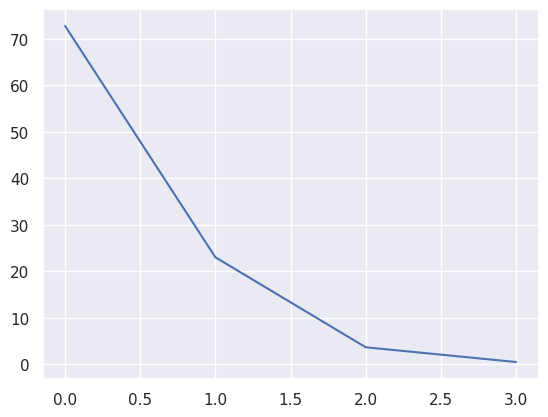

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.plot(results.explained_variance_ratio_*100) # scree plot
plt.show()

In [18]:
pd.DataFrame(results.components_)

,0,1,2,3
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,-0.721017,0.242033,0.140892,0.633801
3,-0.261996,0.124135,0.801154,-0.523546


In [19]:
pd.DataFrame(Z[:,:3], columns=list(
[u'Sepal Length (Cm)', u'Sepal Width (Cm)', u'Petal Length (Cm)'])).head(10)

,Sepal Length (Cm),Sepal Width (Cm),Petal Length (Cm)
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
5,-2.070537,1.518549,0.030684
6,-2.445711,0.074563,0.342198
7,-2.233842,0.247614,-0.082574
8,-2.341958,-1.095146,0.153562
9,-2.188676,-0.448629,-0.246560


In [20]:
#Using all 4 variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
pred = neigh.predict(X)
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[50  0  0]
 [ 0 47  4]
 [ 0  3 46]]

Accuracy:
0.9533333333333334


In [21]:
#Using only 3 variables
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Z[:,:3],y)
pred = neigh.predict(Z[:,:3])
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Confusion matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Accuracy:
0.96
